# CFS

NOAA's Climate Forecast System.

<https://cfs.ncep.noaa.gov/>


In [11]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc, ccrs
import matplotlib.pyplot as plt

## Monthly Product

In [6]:
H = Herbie("2024-05-25", model="cfs_monthly", member=1, YYYYMM="202407", hour=None)

✅ Found ┊ model=cfs_monthly ┊ product=flxf ┊ 2024-May-25 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [8]:
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1.0,0,64800.0,0-64800,2024-05-25,2024-05-25,UFLX,surface,2-3 month ave fcst,:UFLX:surface:2-3 month ave fcst
1,2.0,64801,128325.0,64801-128325,2024-05-25,2024-05-25,VFLX,surface,2-3 month ave fcst,:VFLX:surface:2-3 month ave fcst
2,3.0,128326,187255.0,128326-187255,2024-05-25,2024-05-25,SHTFL,surface,2-3 month ave fcst,:SHTFL:surface:2-3 month ave fcst
3,4.0,187256,249578.0,187256-249578,2024-05-25,2024-05-25,LHTFL,surface,2-3 month ave fcst,:LHTFL:surface:2-3 month ave fcst
4,5.0,249579,321695.0,249579-321695,2024-05-25,2024-05-25,TMP,surface,2-3 month ave fcst,:TMP:surface:2-3 month ave fcst
...,...,...,...,...,...,...,...,...,...,...
98,97.0,5119805,5162753.0,5119805-5162753,2024-05-25,2024-05-25,VBDSF,surface,2-3 month ave fcst,:VBDSF:surface:2-3 month ave fcst
99,98.0,5162754,5202292.0,5162754-5202292,2024-05-25,2024-05-25,VDDSF,surface,2-3 month ave fcst,:VDDSF:surface:2-3 month ave fcst
100,99.0,5202293,5251385.0,5202293-5251385,2024-05-25,2024-05-25,NBDSF,surface,2-3 month ave fcst,:NBDSF:surface:2-3 month ave fcst
101,100.0,5251386,5294847.0,5251386-5294847,2024-05-25,2024-05-25,NDDSF,surface,2-3 month ave fcst,:NDDSF:surface:2-3 month ave fcst


In [7]:
H.inventory("TMP:2 m")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
37,37.0,2308439,2382743.0,2308439-2382743,2024-05-25,2024-05-25,TMP,2 m above ground,2-3 month ave fcst,:TMP:2 m above ground:2-3 month ave fcst


In [9]:
ds = H.xarray("TMP:2 m")

👨🏻‍🏭 Created directory: [/home/blaylock/data/cfs_monthly/20240525]


In [10]:
ds

<xarray.Dataset> Size: 296kB
Dimensions:              (latitude: 190, longitude: 384)
Coordinates:
    time                 datetime64[ns] 8B 2024-05-25
    step                 timedelta64[ns] 8B 90 days
    heightAboveGround    float64 8B 2.0
  * latitude             (latitude) float64 2kB 89.28 88.34 ... -88.34 -89.28
  * longitude            (longitude) float64 3kB 0.0 0.9375 ... 358.1 359.1
    valid_time           datetime64[ns] 8B 2024-08-23
    gribfile_projection  object 8B None
Data variables:
    mean2t               (latitude, longitude) float32 292kB 273.3 ... 224.7
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   cfs_monthly
    product:                 flxf
    description:             Climate Forecast System; Monthly Means
    remote_grib:             https://noaa-cfs-pds.s3.amazonaws.com/cfs.202405...
    local_grib:              /home/blaylock/data/cfs_monthly/20240525/subset_...
    search:                  TMP:2 m

Text(0.5, 1.0, 'Initialized:2024-05-25\nMember:1; Month:202407; Hour:None')

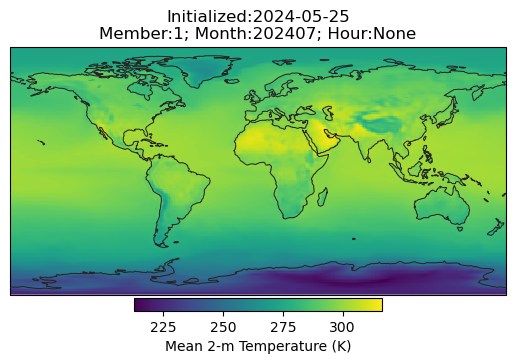

In [13]:
ax = EasyMap(crs=ds.herbie.crs).ax
art = ax.pcolormesh(ds.longitude, ds.latitude, ds.mean2t, transform=pc)

plt.colorbar(
    art,
    ax=ax,
    shrink=0.5,
    pad=0.01,
    orientation="horizontal",
    label="Mean 2-m Temperature (K)",
)

ax.set_title(
    f"Initialized:{H.date:%Y-%m-%d}\nMember:{H.member}; Month:{H.YYYYMM}; Hour:{H.hour}"
)

## 6 Hourly Product

In [20]:
H = Herbie("2024-12-25", model="cfs_6_hourly", member=1, forecast="2024-12-25 00")

✅ Found ┊ model=cfs_6_hourly ┊ product=flxf ┊ 2024-Dec-25 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [21]:
H.inventory("TMP:2 m")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
37,37.0,2027725,2110551.0,2027725-2110551,2024-12-25,2024-12-25,TMP,2 m above ground,anl,:TMP:2 m above ground:anl


👨🏻‍🏭 Created directory: [/home/blaylock/data/cfs_6_hourly/20241225]


Text(0.5, 1.0, 'Initialized:2024-12-25\nMember:1')

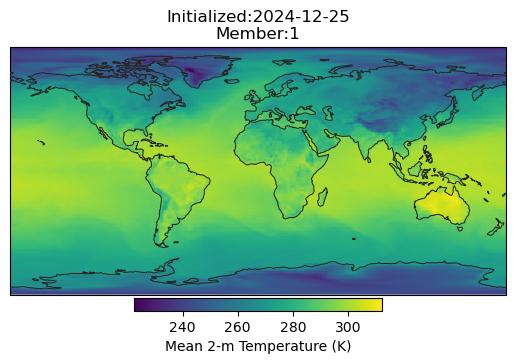

In [22]:
ds = H.xarray("TMP:2 m")

ax = EasyMap(crs=ds.herbie.crs).ax
art = ax.pcolormesh(ds.longitude, ds.latitude, ds.t2m, transform=pc)

plt.colorbar(
    art,
    ax=ax,
    shrink=0.5,
    pad=0.01,
    orientation="horizontal",
    label="Mean 2-m Temperature (K)",
)

ax.set_title(f"Initialized:{H.date:%Y-%m-%d}\nMember:{H.member}")